[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kjmobile/YOUR_REPO/blob/main/1_LM_Simple_Linear_to_Polynomial_Regression.ipynb)

# Simple Linear to Polynomial Regression (NumPy ndarray ver )
This notebook implements linear and polynomial regression using NumPy arrays.

## Data Prep

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [18]:
# Load data
fish_df = pd.read_csv('https://raw.githubusercontent.com/kjmobile/data/refs/heads/main/ml/fish_l.csv')
fish_df.head()

,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.5200,4.0200
1,Bream,290.0,26.3,12.4800,4.3056
2,Bream,340.0,26.5,12.3778,4.6961
3,Bream,363.0,29.0,12.7300,4.4555
4,Bream,430.0,29.0,12.4440,5.1340


In [19]:
# Convert to NumPy array
fish = fish_df[["Length", "Weight"]].to_numpy()
print("Data shape:", fish.shape)
print("\nFirst 5 rows:")
print(fish[:5])

Data shape: (159, 2)

First 5 rows:
[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


### Why reshape(-1, 1)?

scikit-learn expects 2D arrays for features (X), even if there's only one feature.
- `fish[:, 0]` creates a 1D array: `[25.4, 26.3, 26.5, ...]`
- `fish[:, 0].reshape(-1, 1)` creates a 2D array: `[[25.4], [26.3], [26.5], ...]`

In [4]:
# Train-test split (NumPy version)
train_X, test_X, train_y, test_y = train_test_split(
    fish[:, 0].reshape(-1, 1),  # Length as 2D array
    fish[:, 1],                  # Weight as 1D array
    test_size=0.25, 
    random_state=0
)

print(f"Train X shape: {train_X.shape}")
print(f"Train y shape: {train_y.shape}")
print(f"Test X shape: {test_X.shape}")
print(f"Test y shape: {test_y.shape}")

Train X shape: (119, 1)
Train y shape: (119,)
Test X shape: (40, 1)
Test y shape: (40,)


## Simple Linear Regression

Model equation: $Weight = \beta_1 \times Length + \beta_0$

In [20]:
# Train model
m1 = linear_model.LinearRegression()
m1.fit(train_X, train_y)

LinearRegression()

In [21]:
# Check coefficients
print(f"Coefficient (β1): {m1.coef_[0]:.2f}")
print(f"Intercept (β0): {m1.intercept_:.2f}")
print(f"\nModel Equation: Weight = {m1.coef_[0]:.2f} × Length + {m1.intercept_:.2f}")

Coefficient (β1): 28.84
Intercept (β0): -422.75

Model Equation: Weight = 28.84 × Length + -422.75


### Evaluate Model Performance: m1

In [22]:
# Evaluate model with R² score
train_r2 = m1.score(train_X, train_y)
test_r2 = m1.score(test_X, test_y)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Train R²: 0.8221
Test R²: 0.8612


In [23]:
# Prediction
length_60_pred = m1.predict([[60]])[0]
print(f"Predicted weight for 60 inch fish: {length_60_pred:.2f} lbs")

Predicted weight for 60 inch fish: 1307.62 lbs


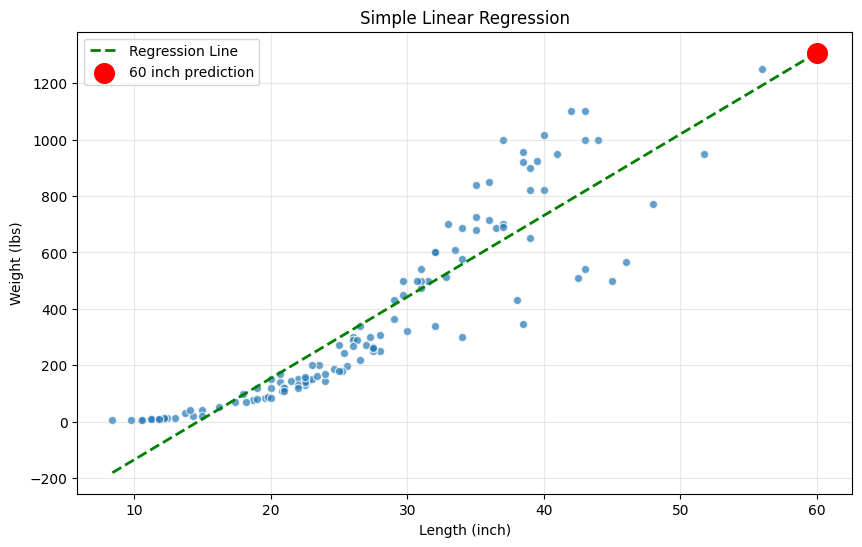

In [24]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(train_X[:, 0], train_y, edgecolor='w', alpha=0.7)
plt.plot([8.4, 60], m1.predict([[8.4], [60]]), ls='--', color='green', linewidth=2, label='Regression Line')
plt.scatter(60, m1.predict([[60]]), color='r', marker="o", s=200, label='60 inch prediction', zorder=5)
plt.xlabel('Length (inch)')
plt.ylabel('Weight (lbs)')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Polynomial Regression

Model equation: $Weight = \beta_2 \times Length^2 + \beta_1 \times Length + \beta_0$

In [25]:
# Add polynomial features (NumPy version)
train_poly = np.column_stack([train_X ** 2, train_X])
test_poly = np.column_stack([test_X ** 2, test_X])

print("Train poly shape:", train_poly.shape)
print("\nFirst 5 rows:")
print(train_poly[:5])

Train poly shape: (119, 2)

First 5 rows:
[[1075.84   32.8 ]
 [ 225.     15.  ]
 [ 576.     24.  ]
 [1296.     36.  ]
 [ 204.49   14.3 ]]


### Understanding np.column_stack

`np.column_stack` combines arrays as columns:
- Input: `train_X = [[25.4], [26.3]]` and `train_X**2 = [[645.16], [691.69]]`
- Output: `[[645.16, 25.4], [691.69, 26.3]]`

In [26]:
# Train model
m2 = linear_model.LinearRegression()
m2.fit(train_poly, train_y)

LinearRegression()

In [12]:
# Check coefficients
print(f"Coefficient for Length² (β2): {m2.coef_[0]:.2f}")
print(f"Coefficient for Length (β1): {m2.coef_[1]:.2f}")
print(f"Intercept (β0): {m2.intercept_:.2f}")
print(f"\nModel Equation: Weight = {m2.coef_[0]:.2f} × Length² + {m2.coef_[1]:.2f} × Length + {m2.intercept_:.2f}")

Coefficient for Length² (β2): 0.18
Coefficient for Length (β1): 18.31
Intercept (β0): -290.02

Model Equation: Weight = 0.18 × Length² + 18.31 × Length + -290.02


### Evaluate Model Performance: m2

In [13]:
# Evaluate model with R² score
train_r2_poly = m2.score(train_poly, train_y)
test_r2_poly = m2.score(test_poly, test_y)

print(f"Train R²: {train_r2_poly:.4f}")
print(f"Test R²: {test_r2_poly:.4f}")

print("\n=== Model Comparison ===")
print(f"Linear Regression Test R²: {test_r2:.4f}")
print(f"Polynomial Regression Test R²: {test_r2_poly:.4f}")
print(f"Improvement: {(test_r2_poly - test_r2):.4f}")

Train R²: 0.8271
Test R²: 0.8896

=== Model Comparison ===
Linear Regression Test R²: 0.8612
Polynomial Regression Test R²: 0.8896
Improvement: 0.0284


In [14]:
# Prediction
length_60_pred_poly = m2.predict([[60**2, 60]])[0]
print(f"Predicted weight for 60 inch fish (polynomial): {length_60_pred_poly:.2f} lbs")
print(f"Predicted weight for 60 inch fish (linear): {length_60_pred:.2f} lbs")
print(f"Difference: {abs(length_60_pred_poly - length_60_pred):.2f} lbs")

Predicted weight for 60 inch fish (polynomial): 1466.95 lbs
Predicted weight for 60 inch fish (linear): 1307.62 lbs
Difference: 159.33 lbs


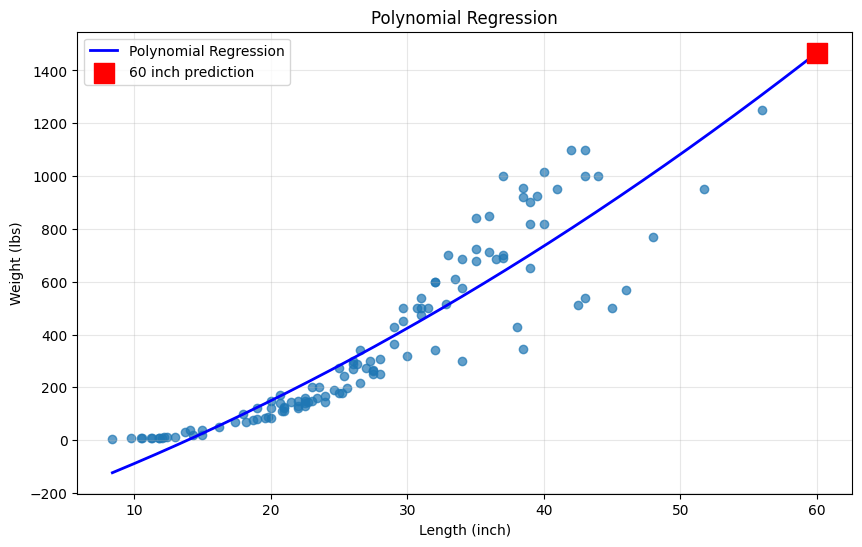

In [15]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(train_X[:, 0], train_y, alpha=0.7)

# Draw polynomial regression line
point = np.arange(8.4, 60, 0.1)
predictions = m2.coef_[0] * point**2 + m2.coef_[1] * point + m2.intercept_
plt.plot(point, predictions, color='blue', linewidth=2, label='Polynomial Regression')

plt.scatter(60, m2.predict([[60**2, 60]]), color='r', marker="s", s=200, label='60 inch prediction', zorder=5)
plt.xlabel('Length (inch)')
plt.ylabel('Weight (lbs)')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Compare Both Models

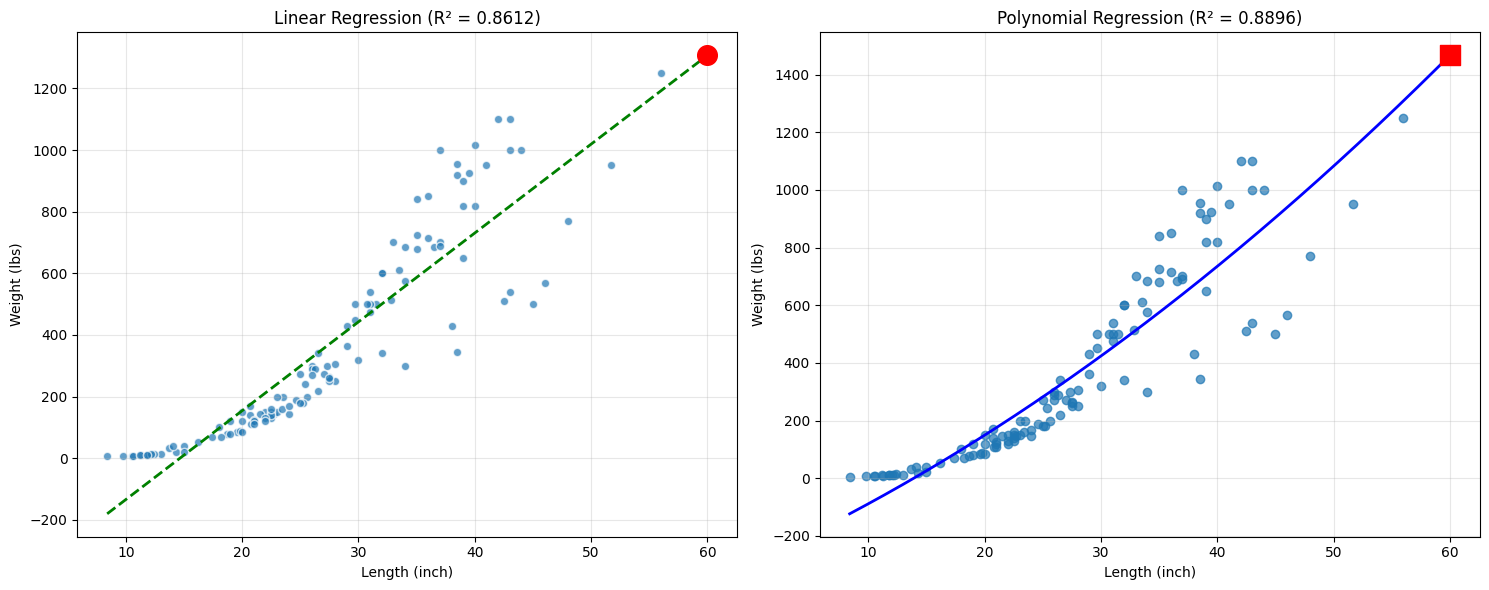

In [16]:
# Side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression
axes[0].scatter(train_X[:, 0], train_y, edgecolor='w', alpha=0.7)
axes[0].plot([8.4, 60], m1.predict([[8.4], [60]]), ls='--', color='green', linewidth=2)
axes[0].scatter(60, m1.predict([[60]]), color='r', marker="o", s=200, zorder=5)
axes[0].set_xlabel('Length (inch)')
axes[0].set_ylabel('Weight (lbs)')
axes[0].set_title(f'Linear Regression (R² = {test_r2:.4f})')
axes[0].grid(True, alpha=0.3)

# Polynomial Regression
axes[1].scatter(train_X[:, 0], train_y, alpha=0.7)
point = np.arange(8.4, 60, 0.1)
predictions = m2.coef_[0] * point**2 + m2.coef_[1] * point + m2.intercept_
axes[1].plot(point, predictions, color='blue', linewidth=2)
axes[1].scatter(60, m2.predict([[60**2, 60]]), color='r', marker="s", s=200, zorder=5)
axes[1].set_xlabel('Length (inch)')
axes[1].set_ylabel('Weight (lbs)')
axes[1].set_title(f'Polynomial Regression (R² = {test_r2_poly:.4f})')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()